In [49]:
import pandas as pd
import os
import re
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
os.getcwd()

'/Users/himanshuaggarwal/PycharmProjects/pythonProject_linkedIn_scraping/data_spain_files'

In [51]:
path = os.getcwd()
all_files = os.listdir(path)
os.listdir(path)[:10]

['data_analytics_spain_nov2021.ipynb',
 'business analyst Barcelona, Catalonia, Spain.csv',
 'Clean_aggregated_data 2.csv',
 'File540.csv',
 'scraper.py',
 'File420.csv',
 'File780.csv',
 'File1020.csv',
 'File960.csv',
 'business intelligence analyst Number of views\n                  \n                  8 views.csv']

In [52]:
path = os.getcwd()
all_files = os.listdir(path)
csv_files = []
for file in all_files:
    if (file.endswith('.csv')) and ('final_aggregate' not in file.lower()):
        csv_files.append(file)

In [53]:
csv_files

['business analyst Barcelona, Catalonia, Spain.csv',
 'Clean_aggregated_data 2.csv',
 'File540.csv',
 'File420.csv',
 'File780.csv',
 'File1020.csv',
 'File960.csv',
 'business intelligence analyst Number of views\n                  \n                  8 views.csv',
 'python developers Barcelona, Catalonia, Spain.csv',
 'business analyst Madrid, Community of Madrid, Spain.csv',
 'File60.csv',
 'File180.csv',
 'data analyst Madrid, Community of Madrid, Spain.csv',
 'sql developer Greater Barcelona Metropolitan Area.csv',
 'File480.csv',
 'File720.csv',
 'Clean_aggregated_data.csv',
 'File240.csv',
 'File1080.csv',
 'File900.csv',
 'File120.csv',
 'cloud_engineer_skill_counts.csv',
 'data engineer Madrid, Community of Madrid, Spain.csv',
 'File660.csv',
 'File1116.csv',
 'File300.csv',
 'test_scrape 2.csv',
 'File840.csv',
 'business intelligence analyst Madrid, Community of Madrid, Spain.csv',
 'data scientist Madrid, Community of Madrid, Spain.csv',
 'File600.csv',
 'data engineer Geta

In [54]:
pd.read_csv(csv_files[8]).head(2)

,Unnamed: 0,index,company_name,position,location,date_posted,Number of applicants,number of views,job_type,employees,sector,descriptions,search_keyword
0,0,1,Vonage,Senior Backend Software Engineer with Java Bar...,"Barcelona, Catalonia, Spain",Posted 1 week ago,0 applicants,Number of views 50 views,Associate,"1,001-5,000 employees",Information Technology & Services,Are you a Software Engineering geek Do you hav...,python developers
1,1,2,InnoIT Consulting,Senior Python Developer,"Barcelona, Catalonia, Spain",Posted 3 days ago,14 applicants,Number of views 80 views,Mid Senior level,51-200 employees,Information Technology & Services,Are you a Python lover looking for new challen...,python developers


In [55]:
df = pd.DataFrame(columns=['company_name', 'position', 'location', 'date_posted','job_type', 'descriptions'])

In [56]:
for file in csv_files:
    temp = pd.read_csv(file)
    temp = temp.drop('Unnamed: 0', axis=1)
    if len(temp.columns) > 20:
        print('1')
        print(file)
        temp = temp[['0', '1', '2', '3', '6', '9']]
        temp.columns = ['company_name', 'position', 'location', 'date_posted','job_type', 'descriptions']
        temp = temp.reset_index(drop=True)
    elif 'search_keyword' in temp.columns:
        print('2')
        print(file)
        temp = temp.drop(['search_keyword'], axis=1)
        if 'date_posted_days_ago' in temp.columns:
            temp = temp.rename(columns={'date_posted_days_ago':'date_posted'})
        temp = temp[['company_name', 'position', 'location', 'date_posted','job_type', 'descriptions']]
    if len(df.columns) == len(temp.columns):
        print('Yes')
        df = pd.concat([df, temp])
    else:
        print('No')

2
business analyst Barcelona, Catalonia, Spain.csv
Yes
2
Clean_aggregated_data 2.csv
Yes
No
No
No
No
No
2
business intelligence analyst Number of views
                  
                  8 views.csv
Yes
2
python developers Barcelona, Catalonia, Spain.csv
Yes
2
business analyst Madrid, Community of Madrid, Spain.csv
Yes
No
No
2
data analyst Madrid, Community of Madrid, Spain.csv
Yes
2
sql developer Greater Barcelona Metropolitan Area.csv
Yes
No
No
No
No
No
No
No
No
2
data engineer Madrid, Community of Madrid, Spain.csv
Yes
No
No
No
1
test_scrape 2.csv
Yes
No
2
business intelligence analyst Madrid, Community of Madrid, Spain.csv
Yes
2
data scientist Madrid, Community of Madrid, Spain.csv
Yes
No
2
data engineer Getafe, Community of Madrid, Spain.csv
Yes
2
sql developer Greater Barcelona Metropolitan Area 2.csv
Yes
2
sql developer Madrid, Community of Madrid, Spain.csv
Yes
No


In [71]:
df = df.dropna(subset = ['company_name', 'position', 'descriptions'])

In [59]:
df = df.reset_index(drop=True)
print("All data read - with REPEATS: ", df.shape)

# Removing duplicates
df = df.drop_duplicates(subset=['company_name', 'position', 'location', 'descriptions', 'job_type'])
print("Data After Dropping Duplicates", df.shape)

All data read - with REPEATS:  (5965, 6)
Data After Dropping Duplicates (2243, 6)


In [60]:
df.columns

Index(['company_name', 'position', 'location', 'date_posted', 'job_type',
       'descriptions'],
      dtype='object')

In [61]:
df.head(2)

,company_name,position,location,date_posted,job_type,descriptions
0,Nestlé,Business Analyst R D and Innovation Apps,"Barcelona, Catalonia, Spain",The Nestlé Group is the world’s largest food a...,Full time,About IT In Nestlé We are a team of IT profess...
1,Carnovo,Business Intelligence Analyst,"Barcelona, Catalonia, Spain",NaN,Associate,At Carnovo we are continuing to revolutionize ...


In [102]:
df['location'].value_counts()

Madrid, Community of Madrid, Spain                                          509
Barcelona, Catalonia, Spain                                                 274
Sant Cugat del Vallès, Catalonia, Spain                                      15
Greater Barcelona Metropolitan Area                                          10
Getafe, Community of Madrid, Spain                                            8
Esplugues de Llobregat, Catalonia, Spain                                      6
L'Hospitalet de Llobregat, Catalonia, Spain                                   5
Number of views\n                  \n                  3 views                4
San Sebastián de los Reyes, Community of Madrid, Spain                        4
Alcobendas, Community of Madrid, Spain                                        4
Number of views\n                  \n                  19 views               3
Number of views\n                  \n                  2 views                3
Number of views\n                  \n   

In [103]:
madrid = df[(df['location'].str.contains('Madrid')) | (df['location'].str.contains('madrid'))]

In [104]:
madrid.shape

(537, 7)

In [105]:
barcelona = df[(df['location'].str.contains('Barcelona')) | (df['location'].str.contains('Catalonia'))]

In [106]:
barcelona.shape

(314, 7)

In [107]:
df.shape

(1004, 7)

In [62]:
# df['date_posted'].unique()

In [63]:
df_na_date_posted = df[df['date_posted'].isna()==True]
df_not_na_date_posted = df[df['date_posted'].isna()==False]

In [64]:
df_not_na_date_posted['date_posted'] = df_not_na_date_posted['date_posted'].astype(str)

<ipython-input-64-2795662c6ed6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_na_date_posted['date_posted'] = df_not_na_date_posted['date_posted'].astype(str)


In [65]:
df_not_na_date_posted = df_not_na_date_posted[~df_not_na_date_posted['date_posted'].str.contains('months')]

In [66]:
df = pd.concat([df_not_na_date_posted, df_na_date_posted], axis=0).sample(frac=1)

In [67]:
df.shape

(2221, 6)

In [68]:
df['position'].value_counts()

Business Analyst                                                                                                     27
Data Engineer                                                                                                        26
Software Engineer                                                                                                    26
Data Scientist                                                                                                       25
Data Analyst                                                                                                         24
Senior Software Engineer                                                                                             19
Full Stack Engineer                                                                                                  18
Software Development Engineer                                                                                        14
Senior Data Engineer                    

In [69]:
df.columns

Index(['company_name', 'position', 'location', 'date_posted', 'job_type',
       'descriptions'],
      dtype='object')

In [72]:
df['position'] = list(map(lambda x: x.lower(), df['position']))
df['company_name'] = list(map(lambda x: x.lower(), df['company_name']))
df['descriptions'] = list(map(lambda x: x.lower(), df['descriptions']))
df['position'] = list(map(lambda x: x.lower(), df['position']))
df['job_type'] = list(map(lambda x: x.lower(), df['job_type']))

In [73]:
df['position'][1]

'business intelligence analyst'

In [74]:
df = df[(df['position'].str.contains('data'))|(df['position'].str.contains('analy'))|(df['position'].str.contains('sql')) | (df['position'].str.contains('bi')) | (df['position'].str.contains('machine learning'))|(df['position'].str.contains('business intelligence')) | (df['position'].str.contains('python'))]

In [75]:
df = df.reset_index(drop=True)
print("Data with clean positions: ", df.shape)

Data with clean positions:  (1004, 6)


In [76]:
df.head()

,company_name,position,location,date_posted,job_type,descriptions
0,mixpanel,data quality analyst,"Barcelona, Catalonia, Spain",Posted 1 month ago,entry level,about mixpanel mixpanel helps companies measur...
1,taiger,senior software engineer python,"Madrid, Community of Madrid, Spain",21.0,associate,unlock better with taiger everything we do at ...
2,apache media group,digital analyst,"Madrid, Community of Madrid, Spain",21.0,entry level,en apache somos apasionados del marketing digi...
3,hr global partners,senior business analyst spain based,"Madrid, Community of Madrid, Spain",1.0,mid senior level,this is a remote position for one of the most ...
4,product madness,product analyst,"Barcelona, Catalonia, Spain",Posted 3 weeks ago,mid senior level,we are looking for a product analyst to work c...


In [77]:
df['job_type'].value_counts()

associate           320
mid senior level    220
full time           216
entry level         200
internship           34
director             10
other                 1
contract              1
part time             1
executive             1
Name: job_type, dtype: int64

In [78]:
df.isna().sum()

company_name     0
position         0
location         1
date_posted     68
job_type         0
descriptions     0
dtype: int64

In [79]:
df_a = df[df['job_type'] == 'full time']
df_b = df[~(df['job_type'] == 'full time')]

In [80]:
df['position'] = list(map(lambda x: re.split(' \w \w \w', x)[0], df['position']))

In [81]:
df['position'].value_counts()

business analyst                                                                                                     30
data engineer                                                                                                        29
data scientist                                                                                                       26
data analyst                                                                                                         25
senior data engineer                                                                                                 13
it business analyst                                                                                                  11
python developer                                                                                                     10
senior data scientist                                                                                                 9
business intelligence engineer          

In [82]:
def jobtype_(x):
    flag = False
    for item in ['executive','senior', 'consultor', 'lead', 'principal', 'sr ', 'consultant', 'manager']:
        if item in x:
            flag = True
            return 'senior'
    if flag == False:
        return 'entry level/junior'
df_a['job_type'] = list(map(jobtype_, df_a['position'])) 

<ipython-input-82-6689f2e3a971>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a['job_type'] = list(map(jobtype_, df_a['position']))


In [83]:
df = pd.concat([df_a, df_b], axis=0).sample(frac=1)

In [84]:
df['job_type'].value_counts()

associate             320
mid senior level      220
entry level           200
entry level/junior    152
senior                 64
internship             34
director               10
other                   1
contract                1
part time               1
executive               1
Name: job_type, dtype: int64

In [85]:
def job_type_final(x):
    if x in ['associate', 'entry level', 'entry level/junior', 'internship', 'contract', 'part time']:
        return 'entry level'
    else:
        return 'senior level'
    

In [86]:
df['job_type_final'] = list(map(job_type_final, df['job_type']))

In [87]:
df['job_type_final'].value_counts()

entry level     708
senior level    296
Name: job_type_final, dtype: int64

In [88]:
df = df.reset_index(drop=True)

In [89]:
df.head()

,company_name,position,location,date_posted,job_type,descriptions,job_type_final
0,snob technologies s l,web business analyst junior,"Barcelona, Catalonia, Spain",Posted 1 week ago,internship,snob technologies sl est une société basée à b...,entry level
1,wunderman thompson españa,data analyst senior,"Madrid, Community of Madrid, Spain",6.0,senior,buscamos analista de datos senior para formar ...,senior level
2,iqvia,data analytics analyst advanced english level,"Madrid, Community of Madrid, Spain",4.0,entry level/junior,join us on our exciting journey position purpo...,entry level
3,netcentric a cognizant digital business,it business analyst,Number of views\n \n ...,Posted 3 days ago,mid senior level,company description at netcentric we come to w...,senior level
4,vestas,shadow payroll analyst,"Madrid, Community of Madrid, Spain",7.0,associate,shadow payroll analyst es madrid professional ...,entry level


In [90]:
entry_level = df[df['job_type_final'] == 'entry level']
entry_level.reset_index(drop=True, inplace = True)

In [91]:
skills = ['excel', 'sql', 'git', 'reporting', 'python', 'tableau', 'statistic', 
'database', 'powerbi', 'ssis', 'agile', 'problem solving', 'scala', 
'looker', 'aws', 'etl', 'a/b ', 'qlik', 'powerpoint', 'java', 'redshift', 'javascript',
'azure', 'data modeling', 'pandas', 'spark', 'scrum', 'critical thinking', 'data studio', 
'gcp', 'html', 'sql server', 'jupyter', 'macros', 's3', 'positive attitude', 'regression', 
'numpy', 'hadoop', 'outlook', 'informatica', 'nosql', 'classification', 'docker', 'hive', 
'athena', 'pyspark', 'big query', 'kafka', 'cleaning', 'storytelling', 'mongodb', 'bash', 
'django', 'wrangling', 'ansible', 'cassandra', 'json', 'hypothesis testing', 'tensorflow',
'keras', 'kubernetes', 'ssrs', 'relational database', 'bayesian', 'scikit', 'chef', 
'orc ', 'parquet', 'structured data', 'communication skill', 'inferential statistics',
'pivot table']

In [92]:
# For ALL THE POSITIONS

In [93]:
skills_count = {}
for skill in skills:
    counter = 0
    for description in df['descriptions']:
        if skill in description:
            counter += 1
    skills_count[skill] = counter

In [94]:
skills_count = pd.DataFrame(dict(sorted(skills_count.items(), key=lambda x: x[1], reverse=True)).items())
skills_count.columns = ['skill', 'count']
skills_count

,skill,count
0,sql,523
1,excel,460
2,python,419
3,git,363
4,reporting,262
5,database,251
6,communication skill,248
7,tableau,212
8,agile,211
9,scala,207


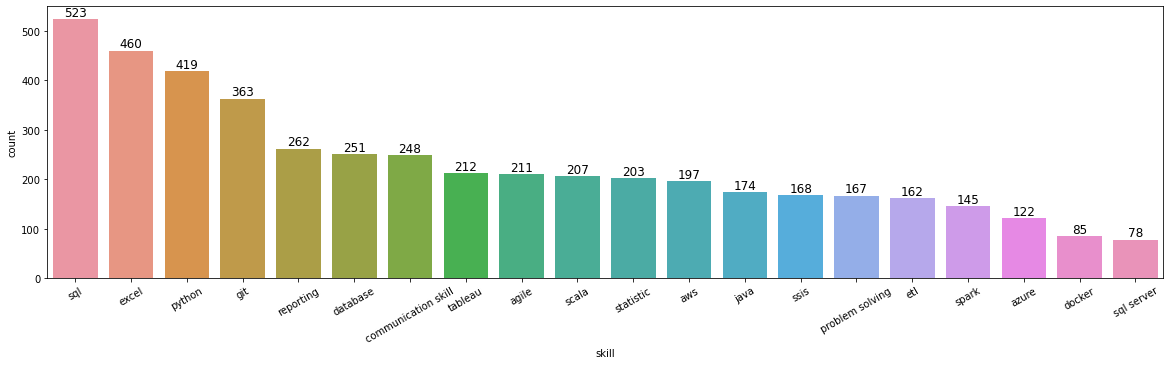

In [95]:
fig, ax = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="skill", y="count", data=skills_count.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

In [96]:
# For entry level positions 

In [97]:
skills_count = {}
for skill in skills:
    counter = 0
    for description in entry_level['descriptions']:
        if skill in description:
            counter += 1
    skills_count[skill] = counter
skills_count = pd.DataFrame(dict(sorted(skills_count.items(), key=lambda x: x[1], reverse=True)).items())
skills_count.columns = ['skill', 'count']
skills_count

,skill,count
0,sql,375
1,excel,332
2,python,296
3,git,238
4,reporting,196
5,communication skill,168
6,database,164
7,tableau,158
8,statistic,154
9,agile,135


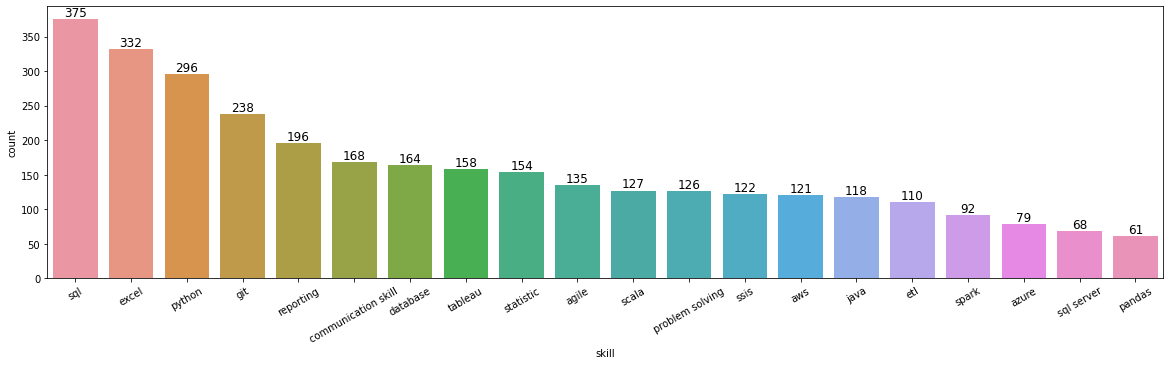

In [98]:
fig, ax = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="skill", y="count", data=skills_count.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

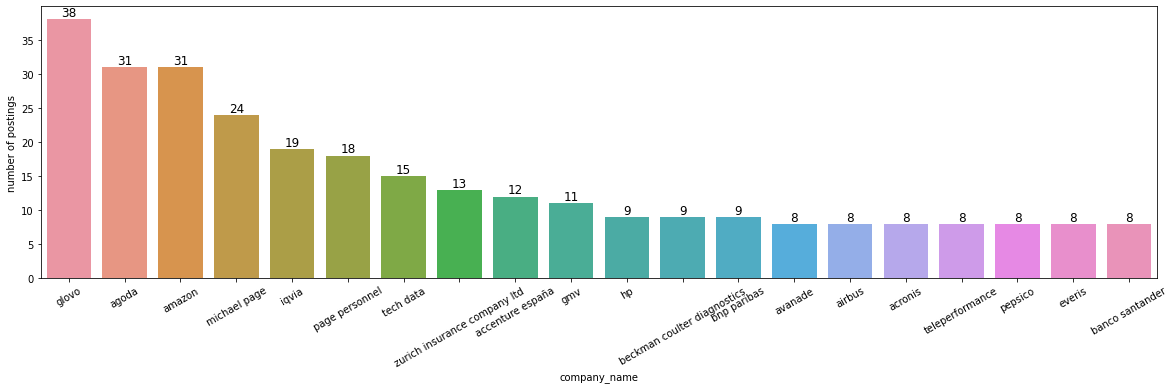

In [99]:
top_companies = pd.DataFrame(df['company_name'].value_counts()).reset_index()
top_companies.columns =['company_name', 'number of postings']
fig, ax = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="company_name", y="number of postings", data=top_companies.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

In [100]:
top_companies

,company_name,number of postings
0,glovo,38
1,agoda,31
2,amazon,31
3,michael page,24
4,iqvia,19
5,page personnel,18
6,tech data,15
7,zurich insurance company ltd,13
8,accenture españa,12
9,gmv,11


In [101]:
list(top_companies['company_name'][:10])

['glovo',
 'agoda',
 'amazon',
 'michael page',
 'iqvia',
 'page personnel',
 'tech data',
 'zurich insurance company ltd',
 'accenture españa',
 'gmv']